# Homework #2
#### Aidan Berres
#### Physics 434
#### 10/15/20

In [14]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import sympy as sp

## Question 1 
* For snake eyes,

Since,

$p(A\, \text{and}\, B) = p(A)\, p(B)$

Thus, $p(\text{Rolling a 1}) = 1\, \text{out of} \, 6 = 1/6$

$p(1\, \text{and}\, 1) = p(1)\, p(1) = 1/6 \cdot 1/6 = 1/36$


Snake eyes probablility is 1/36

* For sum = 7 we can use convolution,

Adding up all the probability products of each different roll, similar to snake eyes since each probability multiplied toghether is 1/36,

p(3 and 4) + p(4 and 3) + p(5 and 2) + p(2 and 5) + p(1 and 6) + p(6 and 1) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 1/6

For sum of 7 it is a 1/6 probability.

Ratio of probabilities would be 1:6.

## Question 2

Showing convolution *analytically*,

For sum = 2

* p(1 and 1) = 1/6 * 1/6 = 1/36

For sum = 3

* p(1 and 2) + p(2 and 1) = 1/36 + 1/36 = 1/18

For sum = 4

* p(2 and 2) + p(3 and 1) + p(1 and 3) = 1/36 + 1/36 + 1/36 = 1/12

For sum = 5

* p(2 and 3) + p(3 and 2) + p(4 and 1) + p(1 and 4) = 1/36 + 1/36 + 1/36 + 1/36 = 1/9

For sum = 6

* p(3 and 3) + p(4 and 2) + p(2 and 4) + p(5 and 1) + p(1 and 5) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 5/36

For sum = 7

* p(3 and 4) + p(4 and 3) + p(5 and 2) + p(2 and 5) + p(1 and 6) + p(6 and 1) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 1/6

For sum = 8

* p(4 and 4) + p(5 and 3) + p(3 and 5) + p(6 and 2) + p(2 and 6) = 1/36 + 1/36 + 1/36 + 1/36 + 1/36 = 5/36

For sum = 9

* p(3 and 6) + p(6 and 3) + p(4 and 5) + p(5 and 4) = 1/36 + 1/36 + 1/36 + 1/36 = 1/9

For sum = 10

* p(5 and 5) + p(6 and 4) + p(4 and 6) = 1/36 + 1/36 + 1/36 = 1/12

For sum = 11

* p(6 and 5) + p(5 and 6) = 1/36 + 1/36 = 1/18

For sum = 12

* p(6 and 6) = 1/6 * 1/6 = 1/36

---
Now showing convolution *numerically*,

In [2]:
die=np.array([1/6,1/6,1/6,1/6,1/6,1/6])
c=np.convolve(die,die)
c

array([0.02777778, 0.05555556, 0.08333333, 0.11111111, 0.13888889,
       0.16666667, 0.13888889, 0.11111111, 0.08333333, 0.05555556,
       0.02777778])

In [3]:
x=np.arange(2,13)
for i in range(len(c)):
    print(f"The Probability of Summing to {x[i]} is {sp.nsimplify(c[i])}")

The Probability of Summing to 2 is 1/36
The Probability of Summing to 3 is 1/18
The Probability of Summing to 4 is 1/12
The Probability of Summing to 5 is 1/9
The Probability of Summing to 6 is 5/36
The Probability of Summing to 7 is 1/6
The Probability of Summing to 8 is 5/36
The Probability of Summing to 9 is 1/9
The Probability of Summing to 10 is 1/12
The Probability of Summing to 11 is 1/18
The Probability of Summing to 12 is 1/36


## Question 3

In [103]:
m=x*c
mean=m.sum()
mean

6.999999999999998

In [106]:
sq=(x-7)**2
var=np.sum(sq*c)
var

5.833333333333334

Thus the mean and the variance are,

Mean = 6.999999999999998

Variance = 5.833333333333334

This makes sense since our largest probability (1/6) is a sum of 7. Also, the Variance makes sense since it fits when you convert it to a standard deviation. The standard deviation of this plot is around 2.41, which makes sense since 2 standard deviations away would be around 11 which would make up around 2.1% of the total probability.

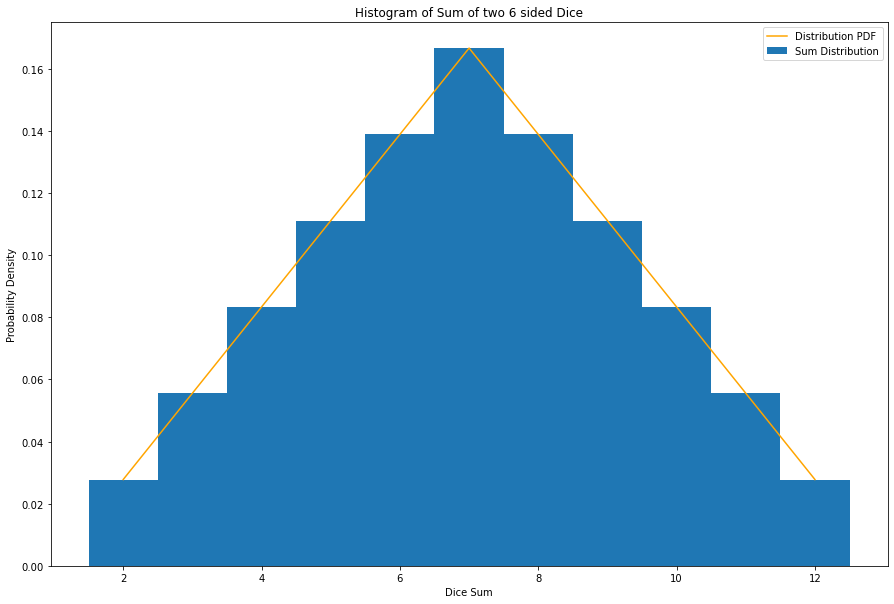

In [168]:
fig, ax = plt.subplots(figsize=(15,10))
x=np.arange(2,13)
xn=np.arange(2,12,step=0.01)
ax.bar(x,c,width=1,label='Sum Distribution')
#ax.plot(x,stats.norm.pdf(x,loc=mean,scale=np.sqrt(var)),c='r',label='Gaussian PDF');
ax.plot(x,c,c='orange',label='Distribution PDF')
ax.set_xlabel('Dice Sum')
ax.set_ylabel('Probability Density')
ax.set_title('Histogram of Sum of two 6 sided Dice')
ax.legend(loc=0);

## Question 4


In [7]:
con=die
for i in range(9):
    con=np.convolve(con,die)

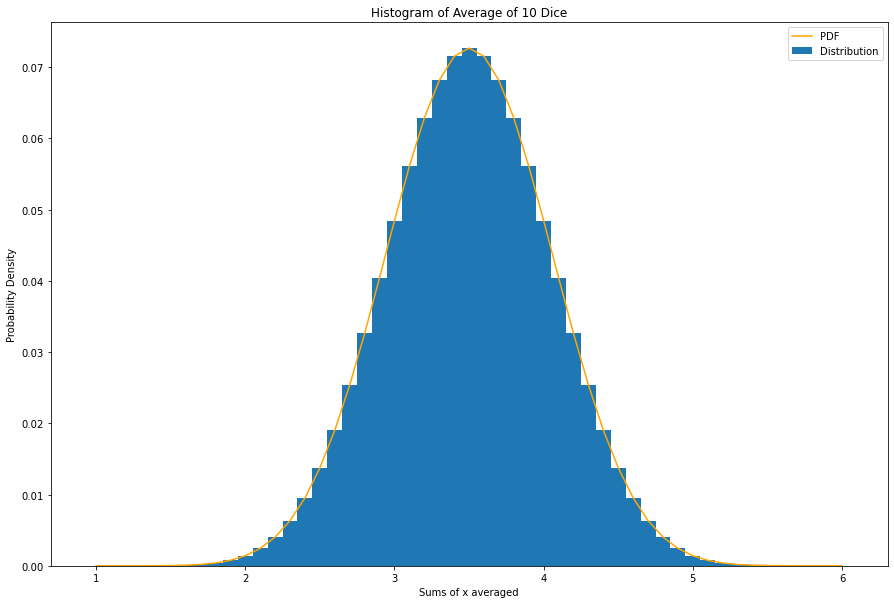

In [172]:
fig, ax = plt.subplots(figsize=(15,10))
xnew=np.arange(1,6.1,step=0.1)
ax.bar(xnew,con,width=0.1,label='Distribution')
#plt.yscale('log')
ax.set_xlabel('Sums of x averaged')
ax.set_ylabel('Probability Density')
ax.set_title('Histogram of Average of 10 Dice')
ax.plot(xnew,con,c='orange',label='PDF')
ax.legend(loc=0);

In [156]:
xnew=np.arange(1,6.1,step=0.1)
s=xnew*con
ms=s.sum()
ms

3.500000000000001

In [157]:
sq=(xnew-ms)**2
var=np.sum(sq*con)
var

0.291666666666667

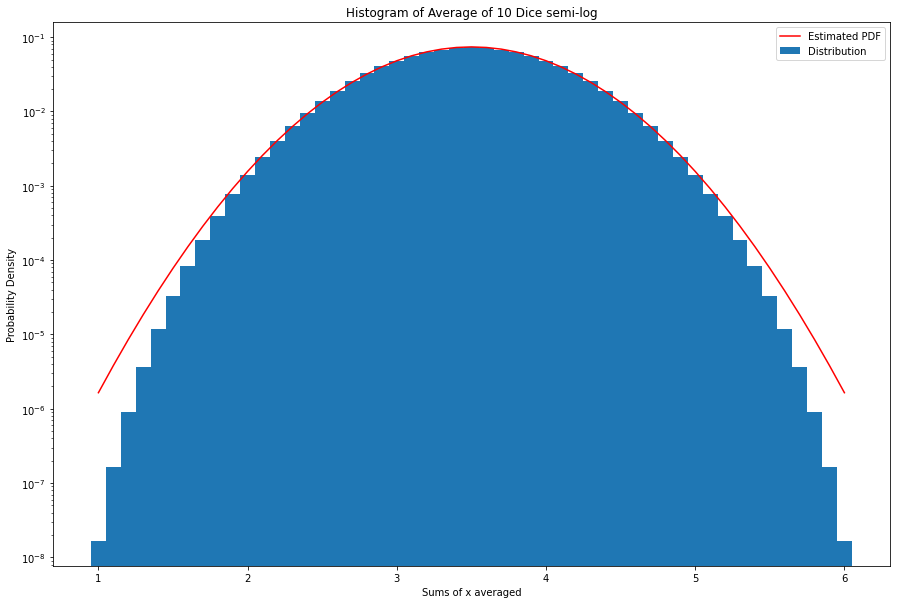

In [176]:
fig, ax = plt.subplots(figsize=(15,10))
xnew=np.arange(1,6.1,step=0.1)
plt.yscale('log')
ax.bar(xnew,con,width=0.1,label='Distribution')
ax.set_xlabel('Sums of x averaged')
ax.set_ylabel('Probability Density')
ax.set_title('Histogram of Average of 10 Dice semi-log')
ax.plot(xnew,stats.norm.pdf(xnew,loc=ms,scale=np.sqrt(var))/10,color='r',label='Estimated PDF')
ax.legend(loc=0);
#ax.plot(xnew,con,c='orange');

As we plot out distribution in a semi-log plane, we can see that it maps out a pretty good parabola. We can prove its a Gaussian distribution further by fitting a Probability Density Function with the same Standard Deviation and Mean values to see that it fits the distribution perfectly. Going by the Central Limit theorem, we can see that as the distribution becomes averaged it becomes more refined towards a Gaussian distribution. 

## Question 5
I am taking samples from the Standard Normal Distribution below. The sets that I take are random choices from the distribution, and I am summing or taking the average of them, then putting it back into an array to be plotted as a histogram.

In [43]:
dis=stats.norm.rvs(size=100000,random_state=69)

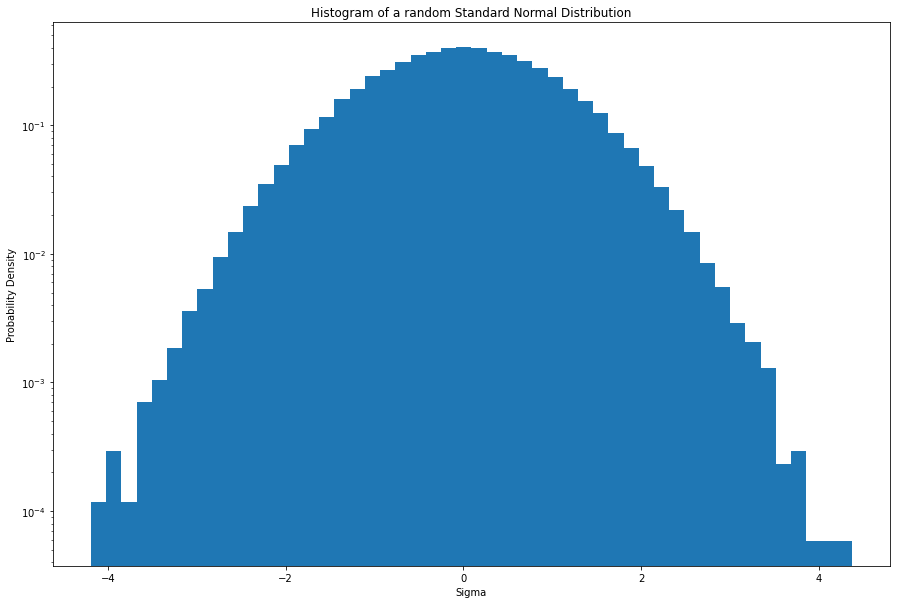

In [177]:
fig, ax = plt.subplots(figsize=(15,10))
plt.yscale('log')
ax.set_xlabel('Sigma')
ax.set_ylabel('Probability Density')
ax.set_title('Histogram of a random Standard Normal Distribution')
ax.hist(dis,bins=50,density=True);
ex=np.arange(-4,4,step=0.01)
#ax.plot(ex,stats.norm.pdf(ex))

In [70]:
s1=np.random.choice(dis,size=10)
s1

array([-1.99873988,  1.09003491,  0.09683382,  0.3201155 , -0.28352971,
        0.03422653,  0.78917972, -0.14238191, -1.23634968,  0.85026387])

In [87]:
nd=[]
#np.random.seed(69420)
for i in range(10000):
    s1=np.random.choice(dis,size=10)
    nd.append(np.sum(s1))

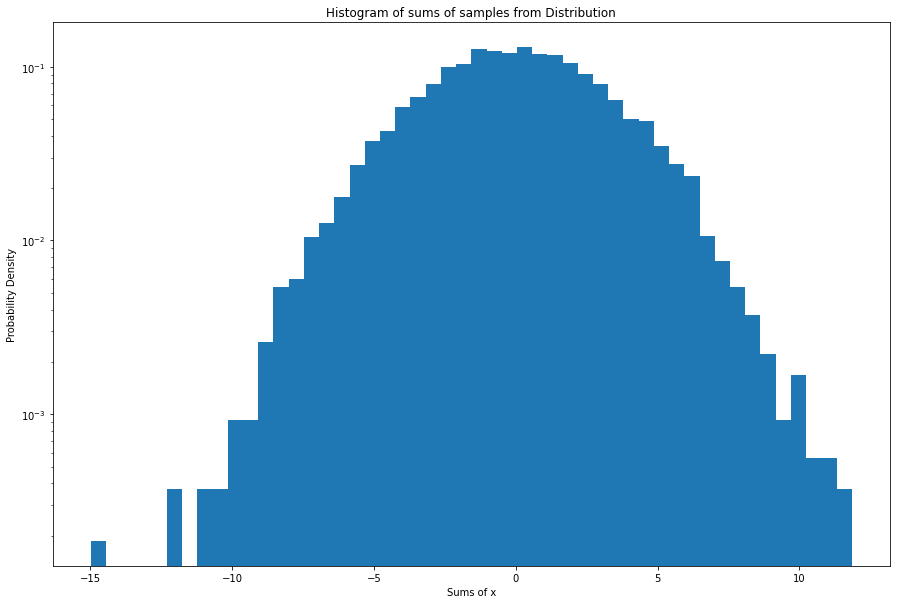

In [178]:
fig, ax = plt.subplots(figsize=(15,10))
plt.yscale('log')
ax.set_xlabel('Sums of x')
ax.set_ylabel('Probability Density')
ax.set_title('Histogram of sums of samples from Distribution')
ax.hist(nd,bins=50,density=True);

In [81]:
nda=[]
#np.random.seed(69420)
for i in range(10000):
    s1=np.random.choice(dis,size=10)
    nda.append(np.mean(s1))

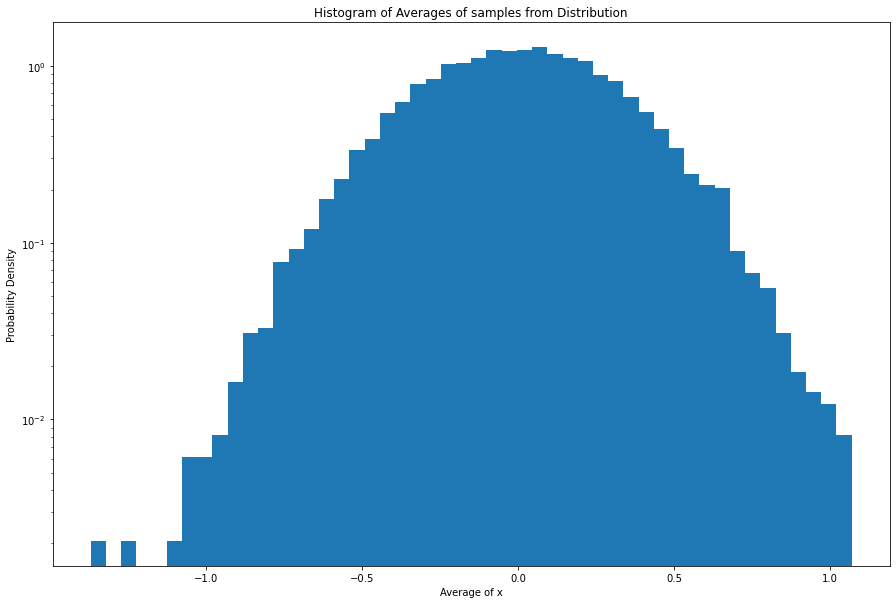

In [179]:
fig, ax = plt.subplots(figsize=(15,10))
plt.yscale('log')
ax.set_xlabel('Average of x')
ax.set_ylabel('Probability Density')
ax.set_title('Histogram of Averages of samples from Distribution')
ax.hist(nda,bins=50,density=True);

We can see that the standard deviation scales down by a factor of 10 since the x-axis values go from -10 to 10 in the sum distribution and then from -1 to 1 in the average distribution. We also see that the x-values changed from the original distribution as well since it went from -4 to 4 then scaled to 10 and then 1.0. I believe the width/standard deviation change reflects the sample size, since I took 10 random samples and summed them. When I averaged the samples I had to sum and divide by 10 that is why the average plot is scaled down by 10. Thus, since the center doesn't seem to change we can say that the sample mean of these plots don't change, but since the scale of the x-axis changes we know a change in the standard deviation had to have been made. For integrating a signal over time you have to take a longer or shorter integral since the standard deviation changes and if we are given a location (aka a measurement) we may not be able to find the correct probability (area) for the signal with similar-looking distributions such as the sum and average distributions.